# Исследование гипотез для увеличения выручки интернет-магазина
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Цель исследования

Запустить A/B-тест и по его результатам принять решение:
Остановить тест, зафиксировать победу одной из групп.
Остановить тест, зафиксировать отсутствие различий между группами.
Продолжить тест.


### Ход исследования

1 часть.
- Получить данные из датафреймов hypothesis.csv, orders.csv и visitors.csv, изучить их.
- При необходимости обработать данные, заполнить пропуски, если такие имеются и это возможно, изменить типы данных, устранить дубликаты, по возможности найти причины и избавиться от аномальных значений.
- Провести приоритизацию гипотез.

2 часть.
- Построить график кумулятивной выручки по группам.
- Построить график кумулятивного среднего чека по группам.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построит график кумулятивного среднего количества заказов на посетителя по группам. 
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Построить точечный график количества заказов по пользователям. 
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. 
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- Подвести итоги A/B-теста.

### Описание данных
Данные для первой части

**Файл /datasets/hypothesis.csv**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

**Файл /datasets/orders.csv**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг 1. Открытие файла с данными, изучение общей информации, подготовка данных для дальнейшего исследования

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Загружаем данные
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
        pd.read_csv('/datasets/orders.csv'),  # заказы
        pd.read_csv('/datasets/visitors.csv'),  # посетители
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('C://work/hypothesis.csv'),  # гипотезы
        pd.read_csv('C://work/orders.csv'),  # заказы
        pd.read_csv('C://work/visitors.csv'),  # посетители
    )

In [3]:
#изучим информацию и посмотрим файл hypothesis.csv
pd.set_option("max_colwidth", 200)
hypothesis.info()
hypothesis.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Изменяем регистр с помощью метода str.lower()
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
#посмотрим пропуски
hypothesis.duplicated().sum()

0

In [6]:
# Подсчитываем количество пропусков в столбцах
hypothesis.isnull().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [7]:
#изучим информацию и первые 5 строк файла orders.csv
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# Изменяем регистр с помощью метода str.lower()
orders.columns = orders.columns.str.lower()

In [9]:
#изменим тип данных столбца date
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
#посмотрим пропуски
orders.duplicated().sum()

0

In [11]:
# Подсчитываем количество пропусков в столбцах
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
#изучим информацию и первые 5 строк файла visitors.csv
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
#изменим тип данных столбца date
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
#посмотрим пропуски
visitors.duplicated().sum()

0

In [15]:
# Подсчитываем количество пропусков в столбцах
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
print('Дата начала тестирования:', orders['date'].min())
print('Дата окончания тестирования:', orders['date'].max())

Дата начала тестирования: 2019-08-01 00:00:00
Дата окончания тестирования: 2019-08-31 00:00:00


<font color='#006957'><b>ВЫВОД</b></font>

В ходе предобработки данных:
- заменили названия столбцов в датасете hypothesis, orders (привели к нижнему регистру)
- изменили тип данных в колонках, содержаших информацию о датах
- пропуски не обнаружены
- дубликаты не обнаружены

Перед тем как начать A/B-тест проверим:

сколько у нас групп в А/В тесте:

In [17]:
print("Количество групп = ", len(set(orders['group'])))

Количество групп =  2


Проводим парный A/B тест.

Количество пользователей в различных группах различается не более, чем на 1%;

In [18]:
# посмотрим, сколько участников в каждой группе
group_a = orders.query('group == "A"')
group_b = orders.query('group == "B"') 
print("Количество участников группы А = ", len(set(group_a['visitorid'])))
print("Количество участников группы B = ", len(set(group_b['visitorid'])))
print("Разница между количеством участников в % = ", ((len(set(group_b['visitorid'])))-len(set(group_a['visitorid'])))/len(set(group_b['visitorid']))*100)

Количество участников группы А =  503
Количество участников группы B =  586
Разница между количеством участников в % =  14.163822525597269


Разница между количеством участников 14,16%, что больше 1%. Различие более одного процента в продажах, это допустимо, ведь мы это и проверяем, подействовали ли наши изменения на продажи.

In [19]:
# посмотрим, сколько пользователей попало в обе группы
group_a_b=list(np.intersect1d(group_a['visitorid'], group_b['visitorid']))
print("Количество участников в группах а и b одновременно = ", len(group_a_b))

Количество участников в группах а и b одновременно =  58


Удаление может сказаться не совсем корректно, ведь мы не можем выявить данных пользователей в данных visitors, поэтому мы можем принять решение, оставить данных пользователей в обоих группах.

### Шаг 2. Приоритизация гипотез

**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируем его методом ICE и его модификацией RICE.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач, считается как:

`ICE = impact * confidence * efforts `

In [20]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] /hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0, 7. 

RICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач, считается как:

`RICE = reach * impact * confidence / efforts `

In [21]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence'] /hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Наиболее перспективные гипотезы по RICE: 7, 2, 0. Так получилось, потому что параметр Reach у гипотез 7,2 равен 10,8 соответсвенно. А 8 гипотеза даже не попала в топ 3, так как оценка количества пользователей, которых затронет изменения от этой гипотезы равна 1.

<font color='#006957'><b>ВЫВОД</b></font>

Результаты несколько разнятся. Это связано с тем, что RICE учитывает оценку количества пользователей, которых затронут изменения и чем их больше, тем приоритет гипотезы выше. Для ICE этот критерий не учитывается.

Стоит отметить, что в обоих случаях можно выделить приоритетными гипотезы под номерами 7, 0, 6. Несмотря на то, что их приоритет разнится при оценке разными фреймворками, в обоих случаях они вверху нашего "рейтинга". Гипотезы же 4, 5, 3, 1 в обоих случаях имеют низкий приоритет.


### Шаг 3. Анализ A/B-теста

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'.

Результат запишем в датафрейм ordersAgregated:

In [23]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [24]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Таким образом в ordersAggregated и visitorsAggregated у нас находятся такие данные, как будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблиц.

Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

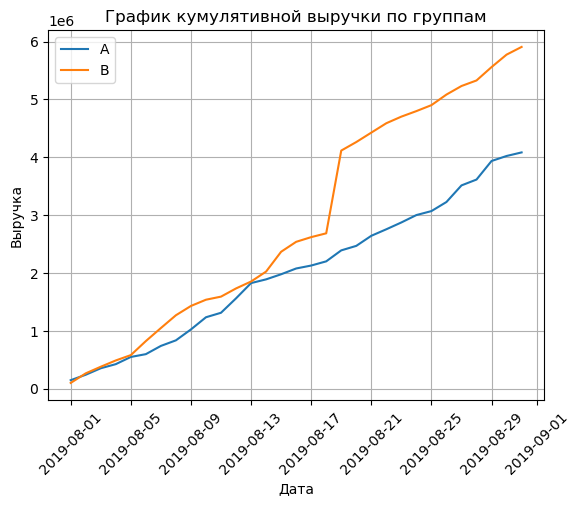

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.show()

**Вывод**

Выручка почти равномерно увеличивается в первой половине теста. После 18 августа, выручка группы B резко возрастает и остается выше до конца теста. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Однозначно утверждать, что группа B лучше на данном шаге нельзя.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

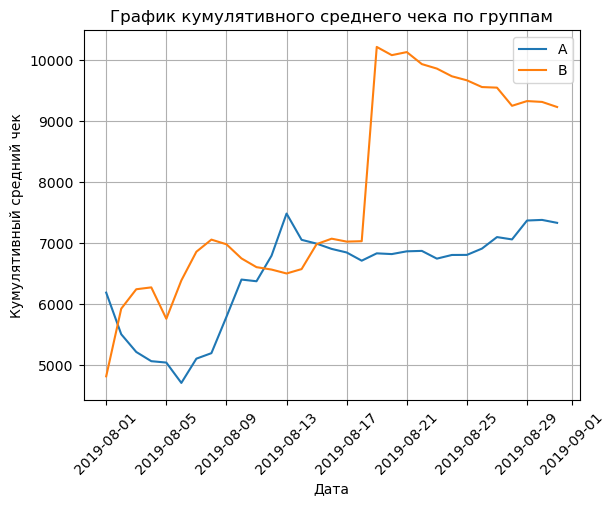

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

**Вывод**

График кумулятивного среднего чека в первой половине месяца неравномерный для обеих групп. 
Опять видим, что после 18 августа в группе В резкий всплеск на графике, что может говорить о том,  что там были совершены крупные заказы, затем произошло равномерное снижение среднего чека, но при этом он остался выше, чем у группы А.


3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline()

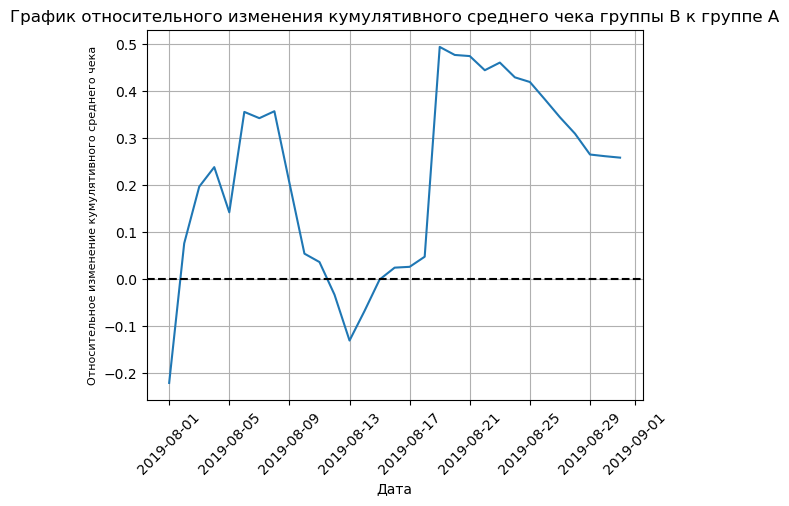

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного cреднего чека', fontsize = 8)
plt.show()

**Вывод**

График относительного изменения кумулятивного среднего чека группы B к группе A так же показывает, что, за исключением лишь нескольких дней, средний чек группы В был выше среднего чека группы А и преимущество сохраняется до конца теста. В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! 
Найдём их позже.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


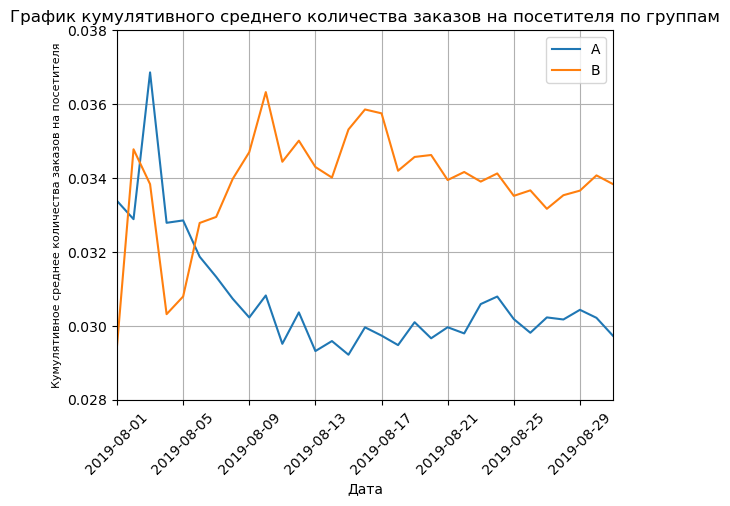

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([orders['date'].min(), orders['date'].max(), 0.028, 0.038])
plt.xticks(rotation=45)
plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов на посетителя', fontsize=8)
plt.show()

**Вывод**

Получился почти симметричный график. Cреднее количество покупок на посетителя в группе В вырвалось вперёд и зафиксировалось почти в самом начале теста, а среднее количество покупок на посетителя группы А упало и также зафиксировалось.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


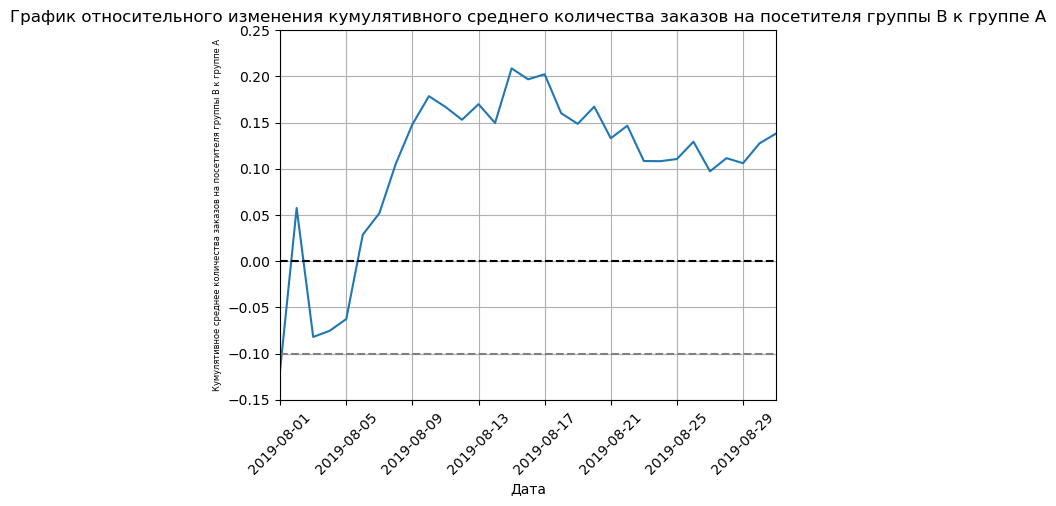

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([orders['date'].min(), orders['date'].max(), -0.15, 0.25])
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение', fontsize=6)
plt.grid(True)
plt.show()

**Вывод** 

В начале теста группа B незначительно проигрывала группе A, но с 5-6 августа отношение кумулятивного среднего количества заказов на посетителя группы B к группе A изменилось в большую сторону. 

В целом отношение кумулятивного среднего количества заказов на посетителя группы B к группе A ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Для начала посмотрим топ-количества заказов в табличном виде:

In [31]:
ordersByUsers = (orders.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
ordersByUsers.columns = ['visitorid', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим точечную диаграмму количества заказов по пользователям:

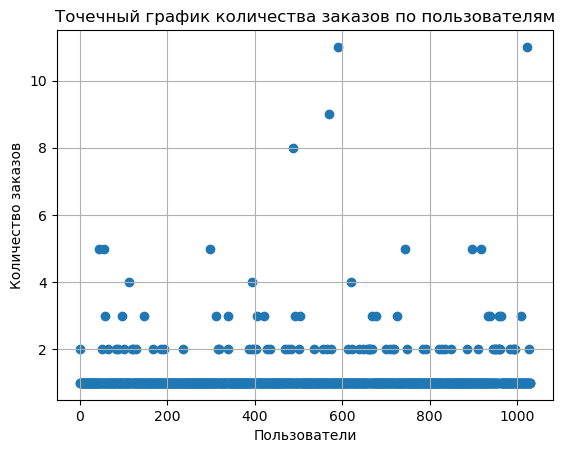

In [32]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи');

**Вывод**

Много пользователей с 1-2 заказами, есть пользователи, сделавшие 3-5 заказов. Но есть и те, кто сделал 8-11 заказов, точная доля таких пользователей не ясна — непонятно, считать их аномалиями или нет. Для этого необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод**

Не более 5% пользователей оформляли больше чем 2 заказа. И не более 1% пользователей заказывали больше 4 раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


Для начала посмотрим топ-стоимости заказов в табличном виде:

In [34]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Уже сейчас видим пользователя, сделавшего заказ на более чем 1 млн. рублей из группы В, который скорее всего и стал причиной аномального всплеска.

Построим точечную диаграмму стоимости заказа:

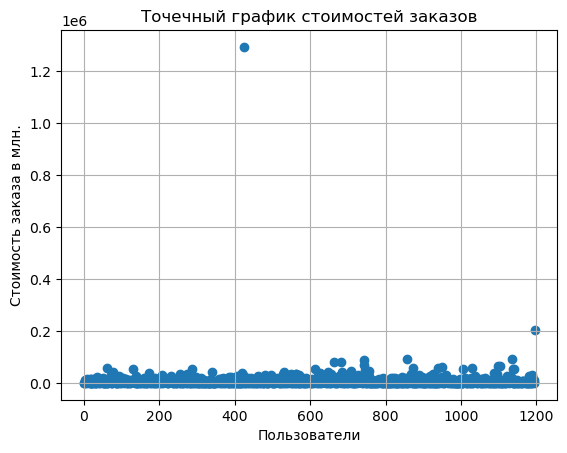

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')
plt.xlabel('Пользователи');


**Вывод**

На графике выделяются 2 заказа, один стоимостью больше 1,2 млн и второй размером больше 200 тысяч.Все остальные заказы ниже 100 тысяч. Для того, чтобы точно определить стоимость заказа, которую следует считать аномальной посчитаем выборочные перцентели.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [36]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод**

Не более 5% пользователей оформляли заказы стоимостью выше 28 тысяч. И не более 1% пользователей совершали заказ крупнее 58 тысяч. 
Разумно выбрать границей для аномальных заказов 28 тысяч.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


Начнём с подготовки данных:

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Столбцы:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Сформулируем гипотезы. 

*Нулевая:* различий в среднем количестве заказов на посетителя между группами нет. 

*Альтернативная:* различия в среднем количестве заказов на посетителя между группами есть.

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [39]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительная разница между сравниваемыми величинами = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value = 0.017
относительная разница между сравниваемыми величинами = 0.138


**Вывод:** 

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Различия в среднем между группами есть.

Относительный выиигрыш группы B равен 13.8% — второе число в выводе.


11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

*Нулевая гипотеза:* различий в среднем чеке между группами нет. 

*Альтернативная гипотеза:* различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

А ещё найдём относительные различия в среднем чеке между группами:

In [40]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительная разница между сравниваемыми величинами = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
относительная разница между сравниваемыми величинами = 0.259


**Вывод:**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Средний чек группы B значительно выше среднего чека группы A, почти на 26%.


12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


Из 7 и 9 пункта мы знаем, что 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователей. 

Посмотрим относительные потери:


In [42]:
print('Относительные потери: {0:.2f} %'.format(abnormalUsers.shape[0]/len(set(orders['visitorid']))*100))

Относительные потери: 7.18 %




Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [44]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница между сравниваемыми величинами = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.013
относительная разница между сравниваемыми величинами = 0.173


**Вывод:**

Результаты по среднему количеству заказов практически не изменились. Напомним, что до исключения значения были: 0.017,
0.138.

Различия в среднем между группами есть. Причем выигрыш группы B увеличился на 4%.




13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Посмотрим по среднему чеку:

In [45]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print(
    "относительная разница между сравниваемыми величинами = {0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
относительная разница между сравниваемыми величинами = -0.02


**Вывод:**

P-value увеличился.

Разница между сегментами сократилась с 26% в пользу B до 0.02% в пользу группы А.
Мы увидели, как сильно аномалии могут влиять на результаты A/B-теста, так как на неочищенных данных средний чек группы В был значительно выше, чем у А.


14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

<font color='#006957'><b>ВЫВОД</b></font>

Имеющиеся факты:
- Различия в среднем кличестве заказов между группами есть, как по "сырым", так и по "очищенным" данным. В группе В их на 16,8% больше;
- Средний чек группы В по «сырым» данным выше, чем у группы А, после фильтрации аномалий разница практически нет;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, в конце исследования приблизительно на 13-14% ,при этом есть тенденция к еще небольшому улучшению;
- График различия среднего чека говорит о преимуществе группы B, но скорее всего это произошло из-за выброса, так как к концу исследования метрика начинает снижаться.

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и констатировать успех и победу группы B : группа B значительно лучше (эффективнее) группы A по среднему количеству заказов на посетителя, хотя по среднему чеку группы примерно равны